In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

In [24]:
df = pd.read_csv("./Gaze Example/gaze.csv")
print(df.shape)
df.head()

(1990, 22)


,Unnamed: 0,x,y,timestamp,gaze_point_validity,left_x,left_y,left_z,right_x,right_y,...,left_validity,right_validity,head_pos_x,head_pos_y,head_pos_z,head_rot_x,head_rot_y,head_rot_z,head_timestamp,head_validity
0,0,2292.0,1525.0,1.984693e+10,1.0,-3.056111,74.432755,570.221802,59.156101,71.958862,...,1.0,1.0,12.238708,85.035507,721.476257,0.193725,0.143565,-0.088005,1.963005e+10,1.0
1,1,1920.0,1125.0,1.984906e+10,1.0,-3.543825,74.968689,571.381775,59.101250,69.640869,...,1.0,1.0,12.238708,85.035507,721.476257,0.193725,0.143565,-0.088005,1.963005e+10,1.0
2,2,1920.0,1125.0,1.984906e+10,1.0,-3.543825,74.968689,571.381775,59.101250,69.640869,...,1.0,1.0,14.353569,86.587143,719.834229,0.290849,0.107475,-0.187275,1.963365e+10,1.0
3,3,1914.0,1124.0,1.984907e+10,1.0,-3.582902,75.032303,571.283875,59.064003,69.761871,...,1.0,1.0,14.353569,86.587143,719.834229,0.290849,0.107475,-0.187275,1.963365e+10,1.0
4,4,1901.0,1130.0,1.984908e+10,1.0,-3.617882,75.097473,571.155518,59.027313,69.895248,...,1.0,1.0,14.353569,86.587143,719.834229,0.290849,0.107475,-0.187275,1.963365e+10,1.0


In [7]:
import json
with open("./Gaze Example/meta.json") as file:
    meta = json.load(file)
print(meta)

{'radiologist': 'b', 'fname': '00dc70e84d141255f7fc6f8038bdd72e.png', 'global_ind': 201, 'num_part': 2, 'num_img': 4, 'x0': 1033, 'y0': 37, 'win_width': 2160, 'win_height': 1773}


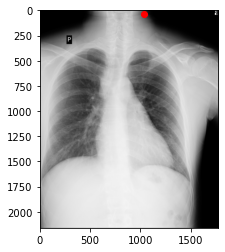

In [59]:
img = Image.open("./Gaze Example/test_gaze.png").convert("RGB")
plt.imshow(img)
plt.scatter(meta['x0'], meta['y0'], c='red')

In [45]:
np.array(img).shape, (meta['x0'], meta['y0']), (min(df['x']), min(df['y'])), (max(df['x']), max(df['y']))

((2160, 1773, 3), (1033, 37), (1150.0, 585.0), (2464.0, 2040.0))

In [46]:
np.array([min(df['x']), min(df['y'])], dtype=float) - np.array(np.array(img).shape[:2], dtype=float)

array([-1010., -1188.])

In [57]:
np.array([max(df['x']), max(df['y'])], dtype=float) - np.array(np.array(img).shape[:2], dtype=float)

array([304., 267.])

[0, 0] is at (left, bottom)

[M', 0] is at (left, top)

[0, N'] is at (right, bottom)

[M', N'] is at (right, top)

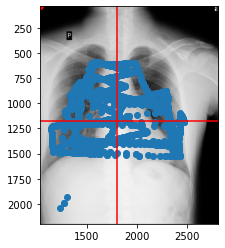

In [99]:
# (left, right, bottom, top)
# plt.imshow(np.flipud(img),origin= 'lower')
# plt.imshow(img, extent=[1033, 2700, 2500, 37])
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(df['x'], df['y'])#.apply(lambda y: -y)) .iloc[::-1]
plt.vlines(df['x'].median(), ymin=37, ymax=2160+37, colors ='red')
plt.hlines(df['y'].median(), xmin=1033, xmax=1773+1033, colors ='red')

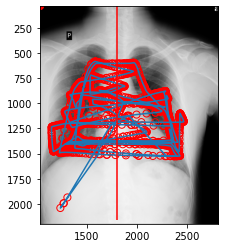

In [90]:
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.plot(df['x'], df['y'])#.apply(lambda y: -y)) .iloc[::-1]
plt.scatter(df['x'], df['y'], s=50, facecolors='none', edgecolors='red')
plt.vlines(df['x'].median(), ymin=37, ymax=2160, colors ='red')

In [95]:
df['head_pos_x'].describe()

count    1990.000000
mean        7.232475
std         2.142114
min         1.294426
25%         6.289528
50%         7.005810
75%         7.828999
max        14.411537
Name: head_pos_x, dtype: float64

In [101]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here
    
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


In [106]:
A = [(df['x'].median(), 37), (df['x'].median(), 2160+37)]
B = [(1033, df['y'].median()), (1173+1033, df['y'].median())]
origin = line_intersection(A,B)
origin

(1803.5, 1171.0)

In [115]:
headx = list(map(lambda x: x + origin[0], list(df['head_pos_x'])))
heady = list(map(lambda y: y + origin[1], list(df['head_pos_y'])))

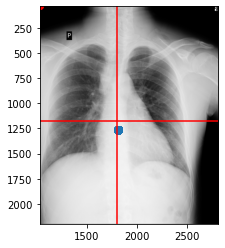

In [116]:
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(headx, heady)
plt.vlines(df['x'].median(), ymin=37, ymax=2160+37, colors ='red')
plt.hlines(df['y'].median(), xmin=1033, xmax=1773+1033, colors ='red')

In [117]:
headx = list(map(lambda x: x * df['x'].std(), list(df['head_pos_x'])))
heady = list(map(lambda y: y * df['y'].std(), list(df['head_pos_y'])))

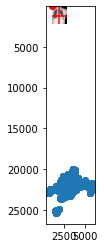

In [118]:
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(headx, heady)
plt.vlines(df['x'].median(), ymin=37, ymax=2160+37, colors ='red')
plt.hlines(df['y'].median(), xmin=1033, xmax=1773+1033, colors ='red')

In [126]:
df['head_pos_y'].describe()

count    1990.000000
mean       90.271405
std         4.078403
min        79.375626
25%        88.417023
50%        91.021835
75%        92.364182
max       101.236893
Name: head_pos_y, dtype: float64

In [127]:
14*df['x'].std(), 101 * df['y'].std()

(5781.38658410482, 25376.428841739104)

In [129]:
def change_range(old_value, old_range, new_range):
    new_min, new_max = new_range
    old_min,old_max = old_range
    new_value = (((old_value - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
    return new_value

In [131]:
old_range = [min(df['head_pos_x']), max(df['head_pos_x'])]
new_range = [min(df['x']), max(df['x'])]
headx = list(map(lambda x: change_range(x,old_range, new_range), list(df['head_pos_x'])))
# heady = list(map(lambda y: y * df['y'].std(), list(df['head_pos_y'])))
# headx

In [133]:
old_range = [min(df['head_pos_y']), max(df['head_pos_y'])]
new_range = [min(df['y']), max(df['y'])]
heady = list(map(lambda y: change_range(y,old_range, new_range), list(df['head_pos_y'])))
# heady

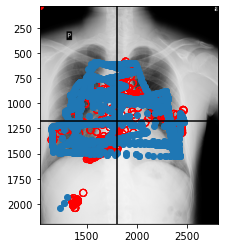

In [137]:
plt.imshow(img, extent=[1033, 1773+1033, 2160+37, 37])
plt.scatter(meta['x0'], meta['y0'], c='red')
plt.scatter(headx, heady, s=50, facecolors='none', edgecolors='red')
plt.vlines(df['x'].median(), ymin=37, ymax=2160+37, colors ='black')
plt.hlines(df['y'].median(), xmin=1033, xmax=1773+1033, colors ='black')
plt.scatter(df['x'], df['y'])

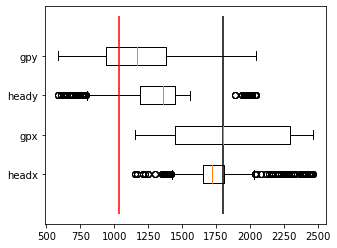

In [159]:
# sns.violinplot(y=df['head_pos_x'])
plt.boxplot([headx, df['x'], heady, df['y']], labels = ['headx', 'gpx', 'heady', 'gpy'], vert=False)
# plt.boxplot([heady, df['y']])#, vert=False)
# plt.boxplot(heady, vert=False)
plt.subplots_adjust(left=0.25)
plt.vlines(df['x'].median(), ymin=0, ymax=5, colors ='black')
plt.vlines(1033, ymin=0, ymax=5, colors ='red')
# plt.xlim([, 50])
plt.show()